In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import math
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv('training_data.csv')

In [3]:
df1.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3545,3.2375,5.0,6.028881,1.051118,4660.0,2.717201,38.10,-122.14,1.924
1,36760,4.5500,18.0,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.991
2,29301,6.0743,16.0,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.610
3,285,3.6875,15.0,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.917
4,30757,6.1273,11.0,6.256544,1.029503,7777.0,2.383468,34.19,-118.64,2.915


In [4]:
df1.shape

(29709, 10)

In [5]:
df1.drop(['id'], axis='columns',inplace = True)

In [6]:
df1.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000
mean,3.854474,26.084856,5.165188,1.062142,1664.366523,2.833073,35.574937,-119.559416,2.077761
std,1.808813,12.162222,1.194982,0.096120,1311.036683,2.999188,2.083048,1.975349,1.157184
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.600000,17.000000,4.359797,1.020216,950.000000,2.392789,33.930000,-121.800000,1.206000
50%,3.517900,25.000000,5.070281,1.054475,1383.000000,2.744425,34.190000,-118.450000,1.807000
75%,4.700000,35.000000,5.865672,1.088657,1858.000000,3.122137,37.700000,-118.020000,2.660000
max,15.000100,52.000000,23.891566,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [8]:
#import sweetviz as sv

In [9]:
#report = sv.analyze(df1)

In [10]:
#report.show_html("./report.html")

In [11]:
df1[df1.AveRooms>10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
161,2.9861,33.0,16.663636,3.427273,568.0,2.131313,39.48,-120.15,1.89700
2044,3.5781,6.0,11.285714,2.823810,88.0,2.397619,33.69,-116.47,1.60000
2935,3.5833,6.0,19.656250,2.206250,69.0,2.700000,33.78,-116.95,1.40000
3285,6.2547,25.0,21.397436,4.461538,181.0,2.769231,37.35,-120.57,1.67600
3307,2.1955,9.0,11.298969,2.401051,1257.0,2.567194,34.26,-117.24,0.75000
3925,5.3989,2.0,11.293103,1.717241,3881.0,1.799310,33.64,-117.61,1.80900
4662,3.7802,24.0,14.855037,2.763780,1079.0,2.595845,34.18,-119.19,1.84100
7923,1.7188,17.0,21.805654,4.038462,102.0,2.441558,39.14,-116.90,0.72200
8259,2.6288,17.0,11.490862,2.206107,1409.0,2.637168,38.07,-120.19,1.52800
8911,7.1978,21.0,11.428005,1.777778,716.0,2.365904,37.28,-121.94,2.77400


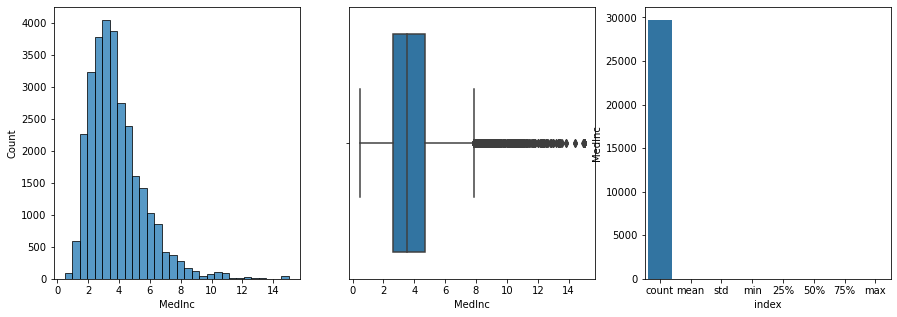

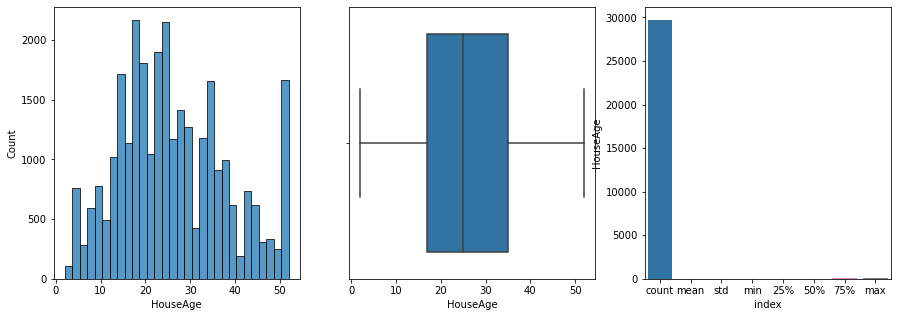

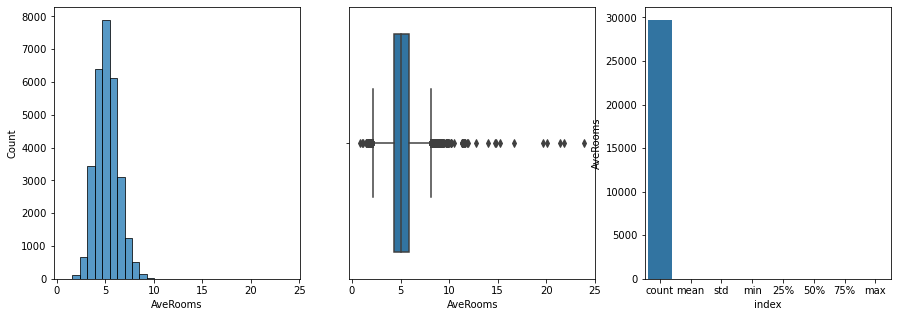

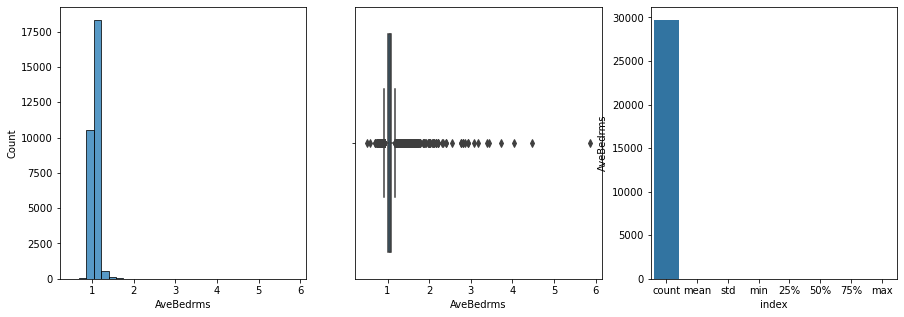

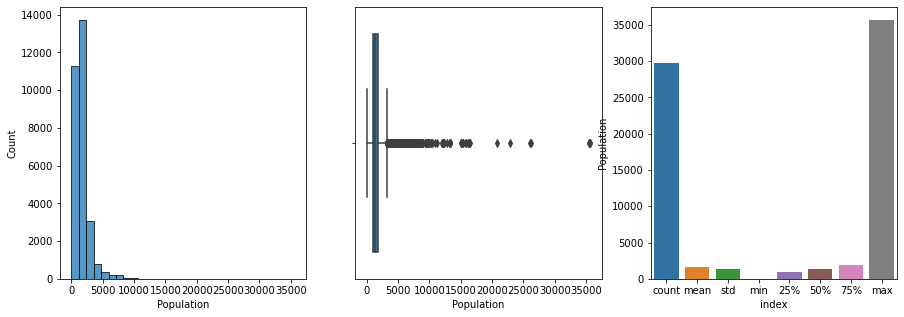

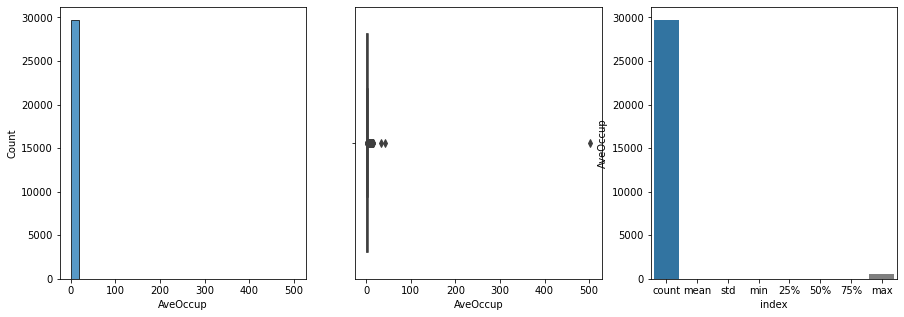

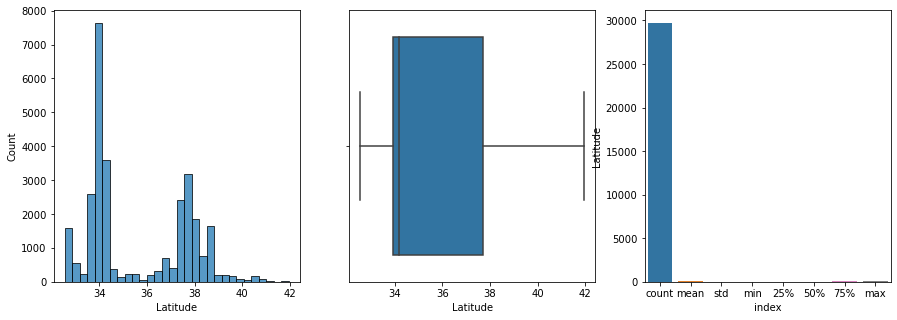

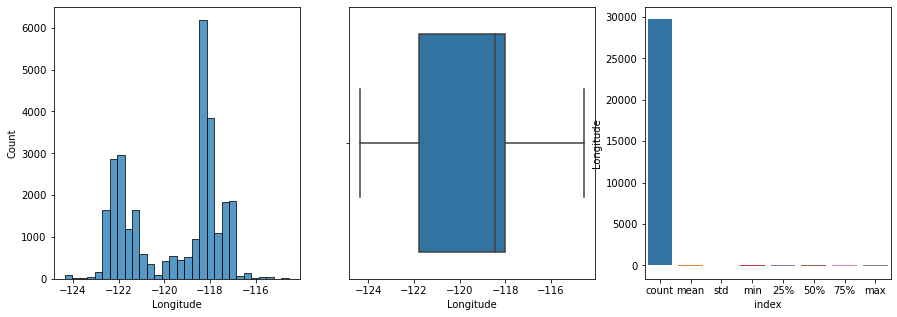

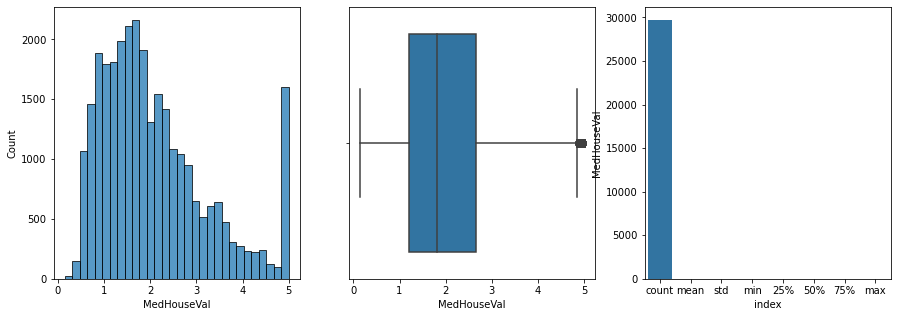

In [12]:
for col in df1:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=df1, x=col, bins=30, ax = axs[0])
    sns.boxplot(x=df1[col], ax=axs[1])
    sns.barplot(data= df1[col].describe().reset_index(), x='index', y=col, ax=axs[2])

<AxesSubplot:>

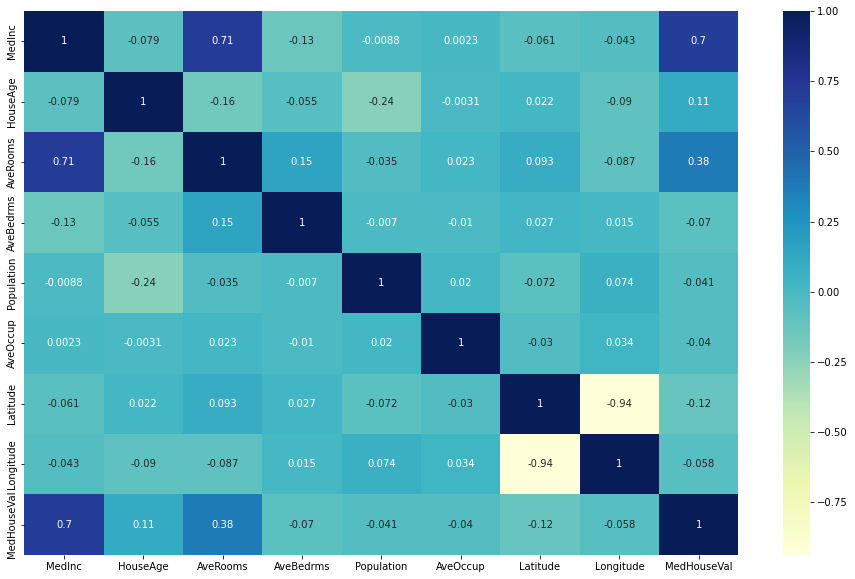

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")

In [14]:
df1['HouseAge'].unique()

array([ 5., 18., 16., 15., 11., 32., 31., 35., 28., 14., 24., 45., 17.,
       25., 47., 52., 37., 33., 22., 34., 40., 36., 13., 20., 21., 10.,
       29., 19., 43., 23., 39., 30., 42., 41., 38.,  9., 27., 26.,  6.,
       44., 50., 46.,  4.,  7., 12., 49.,  2.,  8.,  3., 48., 51.])

In [15]:
  df1['AveOccup'].unique()

array([2.71720117, 3.33001422, 3.09145129, ..., 2.03344867, 3.25378788,
       3.19128631])

In [16]:
 df2 = df1[~(df1.AveOccup>11)]

In [17]:
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.2375,5.0,6.028881,1.051118,4660.0,2.717201,38.10,-122.14,1.924
1,4.5500,18.0,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.991
2,6.0743,16.0,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.610
3,3.6875,15.0,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.917
4,6.1273,11.0,6.256544,1.029503,7777.0,2.383468,34.19,-118.64,2.915
...,...,...,...,...,...,...,...,...,...
29704,4.6923,34.0,6.062972,1.091743,1198.0,2.746992,38.12,-122.17,1.617
29705,3.1553,27.0,4.955882,1.002101,2048.0,2.433628,34.10,-117.18,1.516
29706,2.4844,16.0,5.415350,1.069140,1446.0,3.050691,37.95,-121.31,1.143
29707,5.1072,23.0,5.948012,1.003058,1497.0,3.111888,37.95,-121.98,2.213


In [18]:
df2.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [19]:
Features = df2.drop('MedHouseVal', axis = 'columns')

In [20]:
Target = df2.MedHouseVal

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_x, test_x, train_y, test_y = train_test_split(Features,Target, test_size=0.2,random_state=121)

In [23]:
train_x.shape,test_x.shape,train_y.shape, test_y.shape 

((23756, 8), (5940, 8), (23756,), (5940,))

In [24]:
#model = RandomForestRegressor(random_state=121)

In [25]:
#from sklearn.model_selection import GridSearchCV

In [26]:
#tuned_model.fit(train_x, train_y)

In [27]:
model = LGBMRegressor(random_state=121, class_weight='balanced')

In [28]:
from sklearn.model_selection import cross_val_score

def lgb_cv(n_estimators, max_depth, num_leaves,subsample,colsample_bytree, data, targets):
    estimator = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        num_leaves=num_leaves,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=121,
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_root_mean_squared_error', cv=3)
    return cval.mean()

def lgb_crossval(n_estimators, max_depth, num_leaves,subsample,colsample_bytree):
        return lgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            num_leaves=int(num_leaves),
            subsample=max(min(subsample, 0.999), 1e-3),
            colsample_bytree=max(min(colsample_bytree, 0.999), 1e-3),                            
            data=train_x,
            targets=train_y,
        )
        

In [29]:
optimizer = BayesianOptimization(
        f=lgb_crossval,
        pbounds={
            "n_estimators": (10, 300),
            "max_depth": (5,20),
            "num_leaves": (21, 51),
            "subsample": (0.1, 0.999),
            "colsample_bytree": (0.1, 0.999)
        },
        random_state=121,
        verbose=2
    )
optimizer.maximize(n_iter=20)


|   iter    |  target   | colsam... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
| 1         | -0.6064   | 0.2001    | 8.162     | 77.56     | 25.56     | 0.8463    |
| 2         | -0.5689   | 0.4667    | 13.34     | 226.2     | 28.45     | 0.9708    |
| 3         | -0.6531   | 0.9565    | 12.35     | 15.31     | 46.73     | 0.464     |
| 4         | -0.5701   | 0.6596    | 9.431     | 279.6     | 33.17     | 0.61      |
| 5         | -0.6864   | 0.3209    | 8.386     | 21.1      | 38.43     | 0.8455    |
| 6         | -0.574    | 0.8344    | 8.267     | 280.3     | 32.28     | 0.5557    |
| 7         | -0.6344   | 0.1       | 20.0      | 253.0     | 44.61     | 0.9389    |
| 8         | -0.6334   | 0.1       | 20.0      | 291.1     | 43.53     | 0.999     |
| 9         | -0.6287   | 0.1       | 16.09     | 271.3     | 23.48     | 0.999     |
| 10        | -0.5726   | 0.999     | 5.0       | 274.

In [30]:
optimizer.max

{'target': -0.5680007792701507,
 'params': {'colsample_bytree': 0.4756214719148816,
  'max_depth': 18.550828599084348,
  'n_estimators': 131.42417502803661,
  'num_leaves': 34.67149229451265,
  'subsample': 0.8424699576520365}}

In [31]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['subsample'] = best_params['subsample']
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['colsample_bytree'] = best_params['colsample_bytree']


In [32]:
best_model = LGBMRegressor(random_state=121)
best_model.set_params(**best_params)
best_model.fit(train_x, train_y)

LGBMRegressor(colsample_bytree=0.4756214719148816, max_depth=18,
              n_estimators=131, num_leaves=34, random_state=121,
              subsample=0.8424699576520365)

In [33]:
bayes_pred = best_model.predict(test_x)

In [34]:
bayes_pred

array([2.27832707, 1.93523035, 2.64379899, ..., 2.19935259, 1.86543791,
       0.93696347])

In [35]:
np.sqrt(mean_squared_error(test_y, bayes_pred))

0.5668491273658558

In [36]:
data = pd.read_csv("testing_data.csv")

In [37]:
house_id = data.id

In [38]:
house_id.head()

0    16148
1     7213
2    23067
3    28335
4    33439
Name: id, dtype: int64

In [39]:
data.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,16148,2.2235,12.0,3.967700,1.177003,1457.0,3.633075,34.09,-117.30
1,7213,4.0484,26.0,6.776596,1.038298,1816.0,3.836257,34.28,-118.74
2,23067,2.3571,20.0,3.621701,1.074380,2919.0,1.554825,37.36,-121.89
3,28335,1.7552,30.0,2.342071,1.093834,1327.0,3.065442,34.05,-118.29
4,33439,2.5754,52.0,3.136150,1.166667,870.0,1.890476,37.78,-122.42


In [40]:
data.isnull().sum()

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [41]:
data.drop('id', axis = 1, inplace=True)

In [42]:
  test_pred = best_model.predict(data)

In [43]:
test_pred

array([0.98744342, 1.93788962, 2.21386302, ..., 3.50815825, 5.28423246,
       1.66176485])

In [44]:
df = pd.DataFrame({"house_id":house_id,"test_pred":test_pred})

In [45]:
df.to_csv("Sample_prediction2.csv",index=False)